# Generate Synthetic Data

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from typing import Tuple


def generate_scrolling_data(
    t, u, a=0.5, b=0.3, c=0.1, noise_std=0.05
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Generate synthetic data for a screen scrolling interaction.
    `t` and `u` are NumPy arrays representing time and input signal.
    """
    assert t is not None, "Time vector t must be provided"
    assert u.shape == t.shape, (
        "Input signal u must have the same shape as time vector t"
    )

    # Screen scroll dynamics in state space representation
    A = np.array([[0, 1], [-c / a, -b / a]])
    B = np.array([[0], [1 / a]])
    C = np.array([[1, 1]])
    D = np.array([[0]])

    sys = signal.StateSpace(A, B, C, D)

    # Simulate the system and add some noise
    t_out, y_clean, x = signal.lsim(sys, u, t)
    noise = np.random.normal(0, noise_std, y_clean.shape)
    y_noisy = y_clean + noise

    return t_out, u, x, y_noisy, y_clean

In [26]:
def generate_multiple_datasets(
    t, N=10, a=0.5, b=0.3, c=0.1, noise_std=0.05
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Generate multiple small datasets for estimating system parameters.
    """
    us = []
    ys = []
    xs = []

    # Generate multiple datasets with different input patterns
    for i in range(N):
        # Generate input signal by randomly turning on an off
        # the input signal every 10 time steps
        u = np.zeros_like(t)

        # Get a random integer
        d = np.random.randint(1, 10)
        for j in range(d):
            e = np.random.rand()
            if e < 0.33:
                u[j * d : (j + 1) * d] = 1.0
            elif e < 0.66:
                u[j * d : (j + 1) * d] = -1.0
            else:
                u[j * d : (j + 1) * d] = 0.0

        # Add some random noise to inputs
        u += np.random.normal(0, 0.1, size=t.shape)

        # Generate data
        t_out, u_out, x, y_noisy, y_clean = generate_scrolling_data(
            t, u, a, b, c, noise_std
        )

        us.append(u_out)
        ys.append(y_noisy)
        xs.append(x)

    return np.array(us), np.array(ys), np.array(xs)


np.random.seed(42)
ts = np.linspace(0, 50, 51)
N = 1
us, ys, xs = generate_multiple_datasets(ts, N)

print(us.shape, xs.shape)

(1, 51) (1, 51, 2)


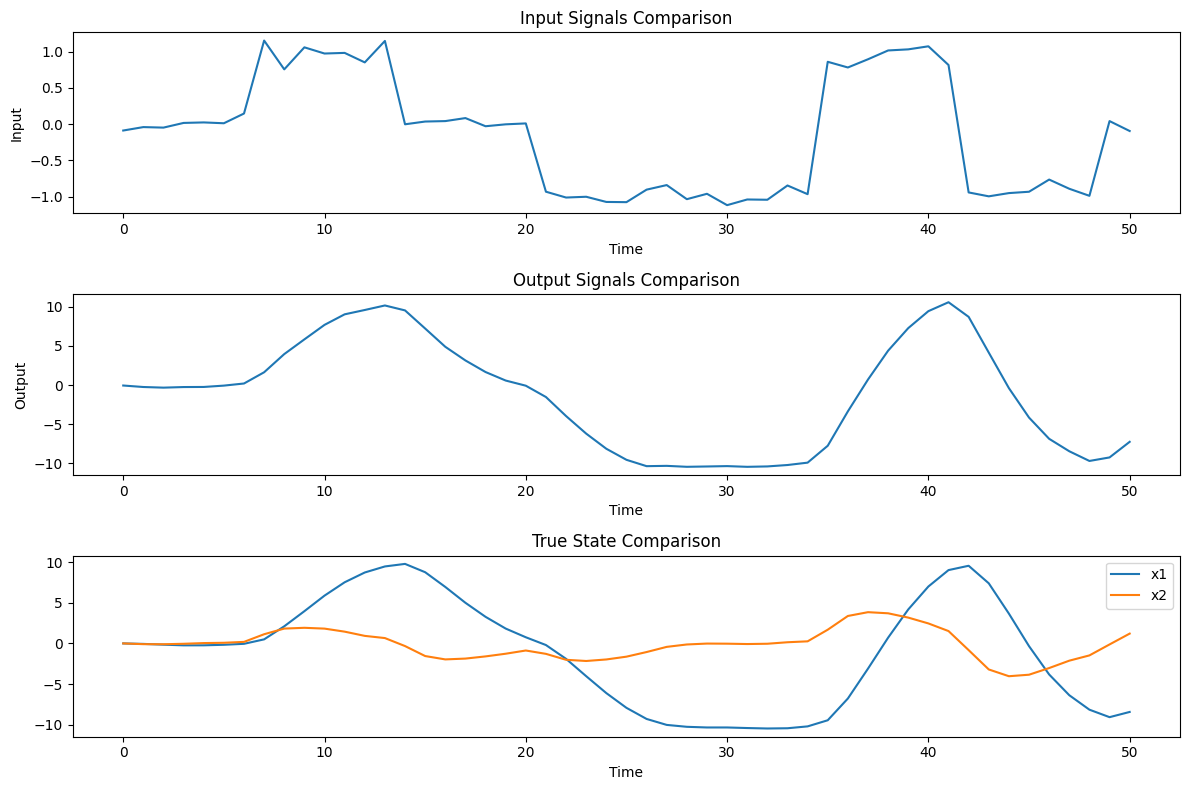

In [27]:
def plot_multiple_datasets(ts, us, ys, xs):
    """Generate and plot multiple datasets"""
    assert us.shape == ys.shape, "Input and output signals must have the same shape"

    N, T = us.shape
    fig = plt.figure(figsize=(12, 8))

    # Plot input signals
    plt.subplot(3, 1, 1)
    for i in range(N):
        plt.plot(ts, us[i, :])
    plt.title("Input Signals Comparison")
    plt.xlabel("Time")
    plt.ylabel("Input")

    # Plot output signals
    plt.subplot(3, 1, 2)
    for i in range(N):
        plt.plot(
            ts,
            ys[i, :],
            label=f"Dataset {i + 1}",
        )
    plt.title("Output Signals Comparison")
    plt.xlabel("Time")
    plt.ylabel("Output")

    # Plot true states
    plt.subplot(3, 1, 3)
    for i in range(N):
        plt.plot(ts, xs[i, :, 0])
        plt.plot(ts, xs[i, :, 1])

    plt.title("True State Comparison")
    plt.legend(["x1", "x2"])
    plt.xlabel("Time")

    plt.tight_layout()

    # Show all figures
    plt.show()

plot_multiple_datasets(ts, us, ys, xs)

# NumPyro Model